# Re-make $dC_\ell/dw_0$, $dC_\ell/dw_a$ using Halofit version 7 for time-varying DE

In [2]:
import crosspower as cp
import FisherCl as fcl # branch quickCl
#import noiseCl as ncl
#import camb
import time #for measuring execution time

# set plotting to be in the notebook instead of its own qt window
%matplotlib inline

IMPORT ERROR: /opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/quicklens/mpi.pyc (No module named pypar). Could not load pbs or pypar. MPI will not be used.


In [3]:
# load FisherMatrix objects
import FisherCl as fcl
import noiseCl as ncl
import crosspower as cp
import pickle

filehandler_lin = open('Fisher_7_16O.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 2 (Gold); from FisherCl branch quickCl
# set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 40
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# fiducial w = -0.95; Casarini Halofit version

#filehandler_lin = open('Fisher_7_16N.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 1 (kludged); from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use getDNDZM (Optimistic); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 66
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# fiducial w = -0.95; Casarini Halofit version

filehandler_nln = open('Fisher_7_16M.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 2 (Gold); from FisherCl branch quickCl
# set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 40
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# fiducial w = -0.95; Casarini Halofit version

#filehandler_nln = open('Fisher_7_16Ln0.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 1 (kludged); from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use getDNDZM (Optimistic); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 66 ('n0' indicates fix)
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# fiducial w = -0.95; Casarini Halofit version



#filehandler_nln = open('Fisher_7_16Jn0.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 1 (kludged); from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use getDNDZM (Optimistic); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 66 (in FisherCl)
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5

#filehandler_nln = open('Fisher_7_16In0.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 2 (Gold); from FisherCl branch quickCl
# set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 40 (in FisherCl)
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5

#filehandler_lin = open('Fisher_7_16Hn0.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 2 (Gold); from FisherCl branch quickCl
# set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 66 (in FisherCl)
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5

#filehandler_lin = open('Fisher_7_16Gn0.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 1 (kludged); from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use getDNDZM (Optimistic); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 66 (in FisherCl)
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5

Fobj2 = pickle.load(filehandler_lin) 
Fobj4 = pickle.load(filehandler_nln) 


lmin = Fobj2.lmin
lmax = Fobj2.lmax
nBins = Fobj2.nBins
nMaps = Fobj2.nBins + 1
nParams = Fobj2.nParams
nCosParams = Fobj2.nParams - Fobj2.nBins
ells = Fobj2.ells
obsNames = Fobj2.obsNames
paramList = Fobj2.paramList

print Fobj2.obsList
print Fobj2.obsNames
print Fobj2.paramList

print Fobj2.Fij.shape
print Fobj2.FijTE.shape
print Fobj2.nParams
print Fobj2.nCosParams

print Fobj2.lmin
print Fobj2.lmax

lminP = Fobj2.lminP
lmaxP = Fobj2.lmaxP
print lminP,lmaxP

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  36.  37.  38.  39.  40.  41.  42.  43.  44.
  45.  46.  47.  48.  49.  50.  54.  55.  56.  57.  58.  59.  60.  61.
  62.  63.  64.  65.  66.  67.  72.  73.  74.  75.  76.  77.  78.  79.
  80.  81.  82.  83.  84.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 108. 109. 110. 111. 112. 113. 114. 115. 116. 117. 118.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 144. 145. 146. 147.
 148. 149. 150. 151. 152. 162. 163. 164. 165. 166. 167. 168. 169. 180.
 181. 182. 183. 184. 185. 186. 198. 199. 200. 201. 202. 203. 216. 217.
 218. 219. 220. 234. 235. 236. 237. 252. 253. 254. 270. 271. 288.]
['k,k', 'k,g1', 'k,g2', 'k,g3', 'k,g4', 'k,g5', 'k,g6', 'k,g7', 'k,g8', 'k,g9', 'k,g10', 'k,g11', 'k,g12', 'k,g13', 'k,g14', 'k,g15', 'k,g16', 'g1,g1', 'g1,g2', 'g1,g3', 'g1,g4', 'g1,g5', 'g1,g6', 'g1,g7', 'g1,g8', 'g1,g9',

In [4]:
# get copies of the derivatives from the objects
crossClsPlus2 = np.copy(Fobj2.crossClsPlus)
crossClsMinus2 = np.copy(Fobj2.crossClsMinus)
crossClsPPlus2 = np.copy(Fobj2.crossClsPPlus)
crossClsPMinus2 = np.copy(Fobj2.crossClsPMinus)
dClVecs2 = np.copy(Fobj2.dClVecs)
dClVecsP2 = np.copy(Fobj2.dClVecsP)

crossClsPlus4 = np.copy(Fobj4.crossClsPlus)
crossClsMinus4 = np.copy(Fobj4.crossClsMinus)
crossClsPPlus4 = np.copy(Fobj4.crossClsPPlus)
crossClsPMinus4 = np.copy(Fobj4.crossClsPMinus)
dClVecs4 = np.copy(Fobj4.dClVecs)
dClVecsP4 = np.copy(Fobj4.dClVecsP)

print crossClsPlus2.shape,crossClsPlus4.shape
print crossClsMinus2.shape,crossClsMinus4.shape
print dClVecs2.shape, dClVecs4.shape

print crossClsPPlus2.shape,crossClsPPlus4.shape
print crossClsPMinus2.shape,crossClsPMinus4.shape
print dClVecsP2.shape, dClVecsP4.shape

(17, 17, 9, 2999) (17, 17, 9, 2999)
(17, 17, 9, 2999) (17, 17, 9, 2999)
(153, 25, 2999) (153, 25, 2999)
(2, 2, 9, 4999) (2, 2, 9, 4999)
(2, 2, 9, 4999) (2, 2, 9, 4999)
(3, 9, 4999) (3, 9, 4999)


In [5]:
nMapsP = 2 # should match above

# Get Fijs and sigmas for comparison later

In [6]:
# get sigmas from original Fobjs to compare against
Fijkg2 = Fobj2.makeFisher(30)
FijTE2 = Fobj2.makeFisher(30,TE=True)
Fijkg4 = Fobj4.makeFisher(30)
FijTE4 = Fobj4.makeFisher(30,TE=True)
print 'done.'

done.


In [7]:
def getSigmas(Fij):
    return np.sqrt(np.diag(np.linalg.inv(Fij)))
sigmas_kg2 = getSigmas(Fijkg2)
sigmas_TE2 = getSigmas(FijTE2)
sigmas_kg4 = getSigmas(Fijkg4)
sigmas_TE4 = getSigmas(FijTE4)
print 'done.'

done.


# Re-make w derivatives

In [8]:
import camb 

# get MatterPower objects
# get params for MatterPower from FisherMatrix:
def getPk(Fobj):
    return cp.MatterPower(nz=Fobj.nz,AccuracyBoost=Fobj.AccuracyBoost,nonlinear=Fobj.nonlinear,**Fobj.cosParams)
def getWin(Fobj,myPk):
    return cp.Window(myPk,zmin=Fobj.zmin,zmax=Fobj.zmax,nBins=Fobj.nBins,
               biasK=cp.ones,biasG=cp.byeBias,dndzMode=Fobj.dndzMode,z0=Fobj.z0,
               doNorm=Fobj.doNorm,useWk=Fobj.useWk,BPZ=Fobj.BPZ,binSmooth=Fobj.binSmooth,
               biasByBin=Fobj.biasByBin)

# set Halofit version
print 'setting Halofit to Casarini (Halofit ver. 7)'
camb.set_halofit_version('casarini')

print 'get linear P(k)...'
myPk2 = getPk(Fobj2)
print 'get nonlinear P(k)...'
myPk4 = getPk(Fobj4)

#chiOfZ2 = myPk2.getChiofZ()
#chiOfZ4 = myPk4.getChiofZ()

print 'done.'

setting Halofit to Casarini (Halofit ver. 7)
get linear P(k)...
neutrino_hierarchy =  degenerate
starting makePkInterp.


finishing makePkInterp.
get nonlinear P(k)...
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
done.


In [9]:
print Fobj2.dndzMode,Fobj4.dndzMode
print Fobj2.nonlinear,Fobj4.nonlinear

2 2
False True


In [10]:
print paramList
print paramList[7:9]
for cParamNum in range(7,9):
    print paramList[cParamNum]

['ombh2', 'omch2', 'cosmomc_theta', 'As', 'ns', 'tau', 'mnu', 'w', 'wa', 'bin1', 'bin2', 'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9', 'bin10', 'bin11', 'bin12', 'bin13', 'bin14', 'bin15', 'bin16']
['w', 'wa']
w
wa


# Remake the next several cells into a function that can save Fisher matrices

In [15]:
# grab some code from FisherCl
tophatBins = True
AccuracyBoost = 3
lpa = 5.0 # set_for_lmax also sets lensing 
#get the total lensed CMB power spectra versus unlensed
#myClName = 'total'
myClName = 'unlensed_scalar'

# parameters list:
# step sizes for discrete derivatives: must correspond to paramList entries!
#   from Allison et. al. (2015) Table III.
nCosParams = 9 # 6 LCDM + Mnu + w0 + wa
paramList = ['ombh2','omch2','cosmomc_theta',  'As', 'ns','tau','mnu', 'w', 'wa']
#deltaP =    [ 0.0008, 0.0030,      0.0050e-2,0.1e-9,0.010,0.020,0.020,0.05,0.025] # nominal
#deltaP =    [ 0.0008, 0.0030,      0.0050e-2,0.1e-9,0.010,0.020,0.020,0.05,0.25] # wa1
#deltaP =    [ 0.0008, 0.0030,      0.0050e-2,0.1e-9,0.010,0.020,0.020,0.05,0.20] # wa2
deltaP =    [ 0.0008, 0.0030,      0.0050e-2,0.1e-9,0.010,0.020,0.020,0.05,0.15] # wa3

nMapsP = 2

# function to make fisher matrices with various values of delta_wa
def checkDeltaWA(deltaWa,label):
    """
    Inputs:
        deltaWa: the delta_wa value to use for 2-sided numeric dCl/dwa
        label: string to append to Fij filename
    
    """
    deltaP =    [ 0.0008, 0.0030,      0.0050e-2,0.1e-9,0.010,0.020,0.020,0.05,0.025]
    deltaP[8] = deltaWa


    # cut deltaP in half to match Byeonghee's step sizes
    deltaP = np.array(deltaP)/2.0

    # note the starting time
    startTime = time.time()

    print 'creating modified parameter lists . . . '
    myParams = Fobj2.cosParams
    myParamsUpper = []
    myParamsLower = []
    for cParamNum in range(nCosParams):
      # add parameter dictionary to lists; HAVE TO BE COPIES!!!
      myParamsUpper.append(myParams.copy())
      myParamsLower.append(myParams.copy())
      # modify parameter number cParamNum in ditionaries
      myParamsUpper[cParamNum][paramList[cParamNum]] += deltaP[cParamNum]
      myParamsLower[cParamNum][paramList[cParamNum]] -= deltaP[cParamNum]

    
    # get the perturbed versions
    # modified for wa only [8:9]
    print 'starting upper spectra for numeric derivatives . . . '
    crossClsPlus_ww2 = Fobj2.getCrossCls(paramList[8:9],myParamsUpper[8:9],
                                         myPk2,
                                         lmin,lmax,nBins,tophatBins=tophatBins)    
    print 'starting lower spectra for numeric derivatives . . . '
    crossClsMinus_ww2 = Fobj2.getCrossCls(paramList[8:9],myParamsLower[8:9],
                                          myPk2,
                                          lmin,lmax,nBins,tophatBins=tophatBins)
    crossClsPlus_ww2 = np.reshape(crossClsPlus_ww2,(nMaps,nMaps,1,lmax-lmin+1))
    crossClsMinus_ww2 = np.reshape(crossClsMinus_ww2,(nMaps,nMaps,1,lmax-lmin+1))

    #print 'done.'
    
    # modified for wa only [8:9]
    print 'starting upper spectra for numeric derivatives . . . '
    crossClsPPlus_ww2  = Fobj2.getCrossClsP(paramList[8:9],myParamsUpper[8:9],
                                       myPk2,
                                       nMaps=nMapsP,lmax=lmaxP,lpa=lpa,
                                       myClName=myClName,
                                       AccuracyBoost=AccuracyBoost)
    print 'starting lower spectra for numeric derivatives . . . '
    crossClsPMinus_ww2 = Fobj2.getCrossClsP(paramList[8:9],myParamsLower[8:9],
                                       myPk2,
                                       nMaps=nMapsP,lmax=lmaxP,lpa=lpa,
                                       myClName=myClName,
                                       AccuracyBoost=AccuracyBoost)
    crossClsPPlus_ww2 = np.reshape(crossClsPPlus_ww2,(nMapsP,nMapsP,1,lmaxP+1))
    crossClsPMinus_ww2 = np.reshape(crossClsPMinus_ww2,(nMapsP,nMapsP,1,lmaxP+1))

    #print 'done.'
        
    # modified for wa only [8:9]
    # set Halofit version
    #print 'setting Halofit to Casarini (Halofit ver. 7)'
    #camb.set_halofit_version('casarini')

    print 'starting upper spectra for numeric derivatives . . . '
    crossClsPlus_ww4 = Fobj4.getCrossCls(paramList[8:9],myParamsUpper[8:9],
                                         myPk4,
                                         lmin,lmax,nBins,tophatBins=tophatBins)    
    print 'starting lower spectra for numeric derivatives . . . '
    crossClsMinus_ww4 = Fobj4.getCrossCls(paramList[8:9],myParamsLower[8:9],
                                          myPk4,
                                          lmin,lmax,nBins,tophatBins=tophatBins)
    crossClsPlus_ww4 = np.reshape(crossClsPlus_ww4,(nMaps,nMaps,1,lmax-lmin+1))
    crossClsMinus_ww4 = np.reshape(crossClsMinus_ww4,(nMaps,nMaps,1,lmax-lmin+1))

    #print 'done.'    
    
    # modified for wa only [8:9]
    # set Halofit version
    #print 'setting Halofit to Casarini (Halofit ver. 7)'
    #camb.set_halofit_version('casarini')

    print 'starting upper spectra for numeric derivatives . . . '
    crossClsPPlus_ww4  = Fobj4.getCrossClsP(paramList[8:9],myParamsUpper[8:9],
                                       myPk4,
                                       nMaps=nMapsP,lmax=lmaxP,lpa=lpa,
                                       myClName=myClName,
                                       AccuracyBoost=AccuracyBoost)
    print 'starting lower spectra for numeric derivatives . . . '
    crossClsPMinus_ww4 = Fobj4.getCrossClsP(paramList[8:9],myParamsLower[8:9],
                                       myPk4,
                                       nMaps=nMapsP,lmax=lmaxP,lpa=lpa,
                                       myClName=myClName,
                                       AccuracyBoost=AccuracyBoost)
    crossClsPPlus_ww4 = np.reshape(crossClsPPlus_ww4,(nMapsP,nMapsP,1,lmaxP+1))
    crossClsPMinus_ww4 = np.reshape(crossClsPMinus_ww4,(nMapsP,nMapsP,1,lmaxP+1))

    #print 'done.'
    
    print crossClsPlus2.shape,crossClsPlus4.shape
    print crossClsMinus2.shape,crossClsMinus4.shape
    print dClVecs2.shape, dClVecs4.shape

    print crossClsPPlus2.shape,crossClsPPlus4.shape
    print crossClsPMinus2.shape,crossClsPMinus4.shape
    print dClVecsP2.shape, dClVecsP4.shape

    print crossClsPlus_ww2.shape,crossClsPlus_ww4.shape
    print crossClsMinus_ww2.shape,crossClsMinus_ww4.shape

    print crossClsPPlus_ww2.shape,crossClsPPlus_ww4.shape
    print crossClsPMinus_ww2.shape,crossClsPMinus_ww4.shape

    # grab some code from FisherCl
    # modified for wa only (8,9)
    #nMapsP = 2 #probably


    # get derivatives wrt parameters
    print 'starting creation of C_l derivatives... '

    # get dC_l^munu/da_i (one vector of derivatives of C_ls for each param a_i)
    # store as matrix with additional dimension for a_i)
    # uses same (shortened) nCls as self.covar and self.obsList
    nCls = nMaps*(nMaps+1)/2
    #self.dClVecs = np.empty((nCls, self.nParams, lmax-lmin+1))
    #Clzeros = np.zeros(lmax-lmin+1) # for putting into dClVecs when needed
    for map1 in range(nMaps):
      print 'starting derivative set ',map1+1,' of ',nMaps,'... '
      for map2 in range(map1,nMaps):
        mapIdx  = map1*nMaps+map2 -map1*(map1+1)/2  
                                   # mapIdx = map index
        # don't need dCl/db for this (omitted)

        # next do numerical derivs wrt nuLCDM params
        #for pIdx in range(nCosParams):
        for pIdx in range(8,9):
          dClPlus  = crossClsPlus_ww2[map1,map2,pIdx-8]
          dClMinus = crossClsMinus_ww2[map1,map2,pIdx-8]
          dClVecs2[mapIdx, pIdx] = (dClPlus-dClMinus)/(2*deltaP[pIdx])
          dClPlus  = crossClsPlus_ww4[map1,map2,pIdx-8]
          dClMinus = crossClsMinus_ww4[map1,map2,pIdx-8]
          dClVecs4[mapIdx, pIdx] = (dClPlus-dClMinus)/(2*deltaP[pIdx])

    nClsP = nMapsP*(nMapsP+1)/2
    #dClVecsP = np.empty((nClsP, self.nCosParams, lmaxP-lminP+1))

    for map1 in range(nMapsP):
        print 'starting primary CMB derivative set ',map1+1,' of ',nMapsP,'... '
        for map2 in range(map1,nMapsP):
            mapIdx  = map1*nMapsP+map2 -map1*(map1+1)/2  # mapIdx = map index
            #for pIdx in range(nCosParams):
            for pIdx in range(8,9):
                dClPlus  = crossClsPPlus_ww2[map1,map2,pIdx-8,lminP:]
                dClMinus = crossClsPMinus_ww2[map1,map2,pIdx-8,lminP:]
                dClVecsP2[mapIdx, pIdx] = (dClPlus-dClMinus)/(2*deltaP[pIdx])
                dClPlus  = crossClsPPlus_ww4[map1,map2,pIdx-8,lminP:]
                dClMinus = crossClsPMinus_ww4[map1,map2,pIdx-8,lminP:]
                dClVecsP4[mapIdx, pIdx] = (dClPlus-dClMinus)/(2*deltaP[pIdx])

    #print 'done.'
    
    
    # Insert new quantities into Fobjs and get new sigmas
    Fobj2.crossClsPlus = np.copy(crossClsPlus2)
    Fobj2.crossClsMinus = np.copy(crossClsMinus2)
    Fobj2.crossClsPPlus = np.copy(crossClsPPlus2)
    Fobj2.crossClsPMinus = np.copy(crossClsPMinus2)
    Fobj2.dClVecs = np.copy(dClVecs2)
    Fobj2.dClVecsP = np.copy(dClVecsP2)

    Fobj4.crossClsPlus = np.copy(crossClsPlus4)
    Fobj4.crossClsMinus = np.copy(crossClsMinus4)
    Fobj4.crossClsPPlus = np.copy(crossClsPPlus4)
    Fobj4.crossClsPMinus = np.copy(crossClsPMinus4)
    Fobj4.dClVecs = np.copy(dClVecs4)
    Fobj4.dClVecsP = np.copy(dClVecsP4)

    Fobj2.Fij = Fobj2.makeFisher(30)
    Fobj2.FijTE = Fobj2.makeFisher(30,TE=True)
    Fobj4.Fij = Fobj4.makeFisher(30)
    Fobj4.FijTE = Fobj4.makeFisher(30,TE=True)

    #def getSigmas(Fij):
    #    return np.sqrt(np.diag(np.linalg.inv(Fij)))

    #sigmas_kg2_new = getSigmas(Fobj2.Fij)
    #sigmas_TE2_new = getSigmas(Fobj2.FijTE)
    #sigmas_kg4_new = getSigmas(Fobj4.Fij)
    #sigmas_TE4_new = getSigmas(Fobj4.FijTE)
    #print 'done.'

    endTime = time.time()
    duration = endTime-startTime
    print duration, ' seconds'
    print duration/60, ' minutes'
    print duration/3600, ' hours'

    # Save the modified Fisher Objects
    """
    filehandler_lin = open('Fisher_7_16O_wa3.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
    #filehandler_lin = open('Fisher_7_16N_wa1.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
    filehandler_nln = open('Fisher_7_16M_wa3.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
    #filehandler_nln = open('Fisher_7_16Ln0_wa1.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,

    #filehandler_nln = open('Fisher_7_16Jn0H7.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
    #filehandler_nln = open('Fisher_7_16In0H7.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
    #filehandler_lin = open('Fisher_7_16Hn0H7.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
    #filehandler_lin = open('Fisher_7_16Gn0H7.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,

    pickle.dump(Fobj2,filehandler_lin)
    pickle.dump(Fobj4,filehandler_nln)
    filehandler_lin.close()
    filehandler_nln.close()
    print 'done.'
    """

    # Instead, just save the Fisher matrices
    baseFileName = 'Fij_set_wa_'
    ext = '.npy'
    fileName = baseFileName+label+ext
    np.save(fileName,[Fobj2.Fij,Fobj2.FijTE,Fobj4.Fij,Fobj4.FijTE])
    
    print 'done.'
    

In [16]:
checkDeltaWA(0.10,'010')

creating modified parameter lists . . . 
starting upper spectra for numeric derivatives . . . 
calculating MatterPower and Window objects for  wa  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.


finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538517
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.3133214947467855
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  3 , binBGs:  1.5057510000145304
calculating window  4 ... 
normalizedDNDZ:  [0.

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

starting lower spectra for numeric derivatives . . . 
calculating MatterPower and Window objects for  wa  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.


finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538517
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.3133214947467855
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  3 , binBGs:  1.5057510000145304
calculating window  4 ... 
normalizedDNDZ:  [0.

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

starting upper spectra for numeric derivatives . . . 
getting Cl power spectra for perturbed parameter  wa


starting lower spectra for numeric derivatives . . . 
getting Cl power spectra for perturbed parameter  wa


starting upper spectra for numeric derivatives . . . 
calculating MatterPower and Window objects for  wa  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538517
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.3133214947467855
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
b

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

starting lower spectra for numeric derivatives . . . 
calculating MatterPower and Window objects for  wa  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538517
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.3133214947467855
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
b

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

starting upper spectra for numeric derivatives . . . 
getting Cl power spectra for perturbed parameter  wa


starting lower spectra for numeric derivatives . . . 
getting Cl power spectra for perturbed parameter  wa
(17, 17, 9, 2999) (17, 17, 9, 2999)
(17, 17, 9, 2999) (17, 17, 9, 2999)
(153, 25, 2999) (153, 25, 2999)
(2, 2, 9, 4999) (2, 2, 9, 4999)
(2, 2, 9, 4999) (2, 2, 9, 4999)
(3, 9, 4999) (3, 9, 4999)
(17, 17, 1, 2999) (17, 17, 1, 2999)
(17, 17, 1, 2999) (17, 17, 1, 2999)
(2, 2, 1, 5001) (2, 2, 1, 5001)
(2, 2, 1, 5001) (2, 2, 1, 5001)
starting creation of C_l derivatives... 
starting derivative set  1  of  17 ... 
starting derivative set  2  of  17 ... 
starting derivative set  3  of  17 ... 
starting derivative set  4  of  17 ... 
starting derivative set  5  of  17 ... 
starting derivative set  6  of  17 ... 
starting derivative set  7  of  17 ... 
starting derivative set  8  of  17 ... 
starting derivative set  9  of  17 ... 
starting derivative set  10  of  17 ... 
starting derivative set  11  of  17 ... 
starting derivative set  12  of  17 ... 
starting derivative set  13  of  17 ...

In [17]:
checkDeltaWA(0.05,'005')

creating modified parameter lists . . . 
starting upper spectra for numeric derivatives . . . 


calculating MatterPower and Window objects for  wa  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538517
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.3133214947467855
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

starting lower spectra for numeric derivatives . . . 
calculating MatterPower and Window objects for  wa  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538517
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.3133214947467855
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
b

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

starting upper spectra for numeric derivatives . . . 
getting Cl power spectra for perturbed parameter  wa


starting lower spectra for numeric derivatives . . . 
getting Cl power spectra for perturbed parameter  wa


starting upper spectra for numeric derivatives . . . 
calculating MatterPower and Window objects for  wa  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538517
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.3133214947467855
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
b

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

starting lower spectra for numeric derivatives . . . 
calculating MatterPower and Window objects for  wa  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538517
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.3133214947467855
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
b

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

starting upper spectra for numeric derivatives . . . 
getting Cl power spectra for perturbed parameter  wa


starting lower spectra for numeric derivatives . . . 
getting Cl power spectra for perturbed parameter  wa
(17, 17, 9, 2999) (17, 17, 9, 2999)
(17, 17, 9, 2999) (17, 17, 9, 2999)
(153, 25, 2999) (153, 25, 2999)
(2, 2, 9, 4999) (2, 2, 9, 4999)
(2, 2, 9, 4999) (2, 2, 9, 4999)
(3, 9, 4999) (3, 9, 4999)
(17, 17, 1, 2999) (17, 17, 1, 2999)
(17, 17, 1, 2999) (17, 17, 1, 2999)
(2, 2, 1, 5001) (2, 2, 1, 5001)
(2, 2, 1, 5001) (2, 2, 1, 5001)
starting creation of C_l derivatives... 
starting derivative set  1  of  17 ... 
starting derivative set  2  of  17 ... 
starting derivative set  3  of  17 ... 
starting derivative set  4  of  17 ... 
starting derivative set  5  of  17 ... 
starting derivative set  6  of  17 ... 
starting derivative set  7  of  17 ... 
starting derivative set  8  of  17 ... 
starting derivative set  9  of  17 ... 
starting derivative set  10  of  17 ... 
starting derivative set  11  of  17 ... 
starting derivative set  12  of  17 ... 
starting derivative set  13  of  17 ...

In [18]:
checkDeltaWA(0.04,'004')

creating modified parameter lists . . . 
starting upper spectra for numeric derivatives . . . 
calculating MatterPower and Window objects for  wa  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.


finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538517
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.3133214947467855
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  3 , binBGs:  1.5057510000145304
calculating window  4 ... 
normalizedDNDZ:  [0.

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

starting lower spectra for numeric derivatives . . . 
calculating MatterPower and Window objects for  wa  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538517
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.3133214947467855
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
b

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

starting upper spectra for numeric derivatives . . . 
getting Cl power spectra for perturbed parameter  wa


starting lower spectra for numeric derivatives . . . 
getting Cl power spectra for perturbed parameter  wa


starting upper spectra for numeric derivatives . . . 
calculating MatterPower and Window objects for  wa  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538517
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.3133214947467855
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
b

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

starting lower spectra for numeric derivatives . . . 
calculating MatterPower and Window objects for  wa  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538517
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.3133214947467855
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
b

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

starting upper spectra for numeric derivatives . . . 
getting Cl power spectra for perturbed parameter  wa


starting lower spectra for numeric derivatives . . . 
getting Cl power spectra for perturbed parameter  wa
(17, 17, 9, 2999) (17, 17, 9, 2999)
(17, 17, 9, 2999) (17, 17, 9, 2999)
(153, 25, 2999) (153, 25, 2999)
(2, 2, 9, 4999) (2, 2, 9, 4999)
(2, 2, 9, 4999) (2, 2, 9, 4999)
(3, 9, 4999) (3, 9, 4999)
(17, 17, 1, 2999) (17, 17, 1, 2999)
(17, 17, 1, 2999) (17, 17, 1, 2999)
(2, 2, 1, 5001) (2, 2, 1, 5001)
(2, 2, 1, 5001) (2, 2, 1, 5001)
starting creation of C_l derivatives... 
starting derivative set  1  of  17 ... 
starting derivative set  2  of  17 ... 
starting derivative set  3  of  17 ... 
starting derivative set  4  of  17 ... 
starting derivative set  5  of  17 ... 
starting derivative set  6  of  17 ... 
starting derivative set  7  of  17 ... 
starting derivative set  8  of  17 ... 
starting derivative set  9  of  17 ... 
starting derivative set  10  of  17 ... 
starting derivative set  11  of  17 ... 
starting derivative set  12  of  17 ... 
starting derivative set  13  of  17 ...

In [19]:
checkDeltaWA(0.03,'003')

creating modified parameter lists . . . 
starting upper spectra for numeric derivatives . . . 
calculating MatterPower and Window objects for  wa  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.


finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538517
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.3133214947467855
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  3 , binBGs:  1.5057510000145304
calculating window  4 ... 
normalizedDNDZ:  [0.

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

starting lower spectra for numeric derivatives . . . 
calculating MatterPower and Window objects for  wa  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538517
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.3133214947467855
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
b

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

starting upper spectra for numeric derivatives . . . 
getting Cl power spectra for perturbed parameter  wa


starting lower spectra for numeric derivatives . . . 
getting Cl power spectra for perturbed parameter  wa


starting upper spectra for numeric derivatives . . . 
calculating MatterPower and Window objects for  wa  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.


finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538517
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.3133214947467855
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  3 , binBGs:  1.5057510000145304
calculating window  4 ... 
normalizedDNDZ:  [0.

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

starting lower spectra for numeric derivatives . . . 
calculating MatterPower and Window objects for  wa  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538517
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.3133214947467855
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
b

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

starting upper spectra for numeric derivatives . . . 
getting Cl power spectra for perturbed parameter  wa


starting lower spectra for numeric derivatives . . . 
getting Cl power spectra for perturbed parameter  wa
(17, 17, 9, 2999) (17, 17, 9, 2999)
(17, 17, 9, 2999) (17, 17, 9, 2999)
(153, 25, 2999) (153, 25, 2999)
(2, 2, 9, 4999) (2, 2, 9, 4999)
(2, 2, 9, 4999) (2, 2, 9, 4999)
(3, 9, 4999) (3, 9, 4999)
(17, 17, 1, 2999) (17, 17, 1, 2999)
(17, 17, 1, 2999) (17, 17, 1, 2999)
(2, 2, 1, 5001) (2, 2, 1, 5001)
(2, 2, 1, 5001) (2, 2, 1, 5001)
starting creation of C_l derivatives... 
starting derivative set  1  of  17 ... 
starting derivative set  2  of  17 ... 
starting derivative set  3  of  17 ... 
starting derivative set  4  of  17 ... 
starting derivative set  5  of  17 ... 
starting derivative set  6  of  17 ... 
starting derivative set  7  of  17 ... 
starting derivative set  8  of  17 ... 
starting derivative set  9  of  17 ... 
starting derivative set  10  of  17 ... 
starting derivative set  11  of  17 ... 
starting derivative set  12  of  17 ... 
starting derivative set  13  of  17 ...

In [20]:
checkDeltaWA(0.02,'002')

creating modified parameter lists . . . 
starting upper spectra for numeric derivatives . . . 
calculating MatterPower and Window objects for  wa  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.


finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538517
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.3133214947467855
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  3 , binBGs:  1.5057510000145304
calculating window  4 ... 
normalizedDNDZ:  [0.

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

starting lower spectra for numeric derivatives . . . 
calculating MatterPower and Window objects for  wa  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538517
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.3133214947467855
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
b

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

starting upper spectra for numeric derivatives . . . 
getting Cl power spectra for perturbed parameter  wa


starting lower spectra for numeric derivatives . . . 
getting Cl power spectra for perturbed parameter  wa


starting upper spectra for numeric derivatives . . . 
calculating MatterPower and Window objects for  wa  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538517
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.3133214947467855
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
b

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

starting lower spectra for numeric derivatives . . . 
calculating MatterPower and Window objects for  wa  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538517
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.3133214947467855
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
b

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

starting upper spectra for numeric derivatives . . . 
getting Cl power spectra for perturbed parameter  wa


starting lower spectra for numeric derivatives . . . 
getting Cl power spectra for perturbed parameter  wa
(17, 17, 9, 2999) (17, 17, 9, 2999)
(17, 17, 9, 2999) (17, 17, 9, 2999)
(153, 25, 2999) (153, 25, 2999)
(2, 2, 9, 4999) (2, 2, 9, 4999)
(2, 2, 9, 4999) (2, 2, 9, 4999)
(3, 9, 4999) (3, 9, 4999)
(17, 17, 1, 2999) (17, 17, 1, 2999)
(17, 17, 1, 2999) (17, 17, 1, 2999)
(2, 2, 1, 5001) (2, 2, 1, 5001)
(2, 2, 1, 5001) (2, 2, 1, 5001)
starting creation of C_l derivatives... 
starting derivative set  1  of  17 ... 
starting derivative set  2  of  17 ... 
starting derivative set  3  of  17 ... 
starting derivative set  4  of  17 ... 
starting derivative set  5  of  17 ... 
starting derivative set  6  of  17 ... 
starting derivative set  7  of  17 ... 
starting derivative set  8  of  17 ... 
starting derivative set  9  of  17 ... 
starting derivative set  10  of  17 ... 
starting derivative set  11  of  17 ... 
starting derivative set  12  of  17 ... 
starting derivative set  13  of  17 ...

In [21]:
checkDeltaWA(0.01,'001')

creating modified parameter lists . . . 
starting upper spectra for numeric derivatives . . . 
calculating MatterPower and Window objects for  wa  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.


finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538517
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.3133214947467855
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  3 , binBGs:  1.5057510000145304
calculating window  4 ... 
normalizedDNDZ:  [0.

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

starting lower spectra for numeric derivatives . . . 
calculating MatterPower and Window objects for  wa  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538517
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.3133214947467855
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
b

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

starting upper spectra for numeric derivatives . . . 
getting Cl power spectra for perturbed parameter  wa


starting lower spectra for numeric derivatives . . . 
getting Cl power spectra for perturbed parameter  wa


starting upper spectra for numeric derivatives . . . 
calculating MatterPower and Window objects for  wa  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.


finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538517
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.3133214947467855
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  3 , binBGs:  1.5057510000145304
calculating window  4 ... 
normalizedDNDZ:  [0.

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

starting lower spectra for numeric derivatives . . . 
calculating MatterPower and Window objects for  wa  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538517
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.3133214947467855
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
b

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

starting upper spectra for numeric derivatives . . . 
getting Cl power spectra for perturbed parameter  wa


starting lower spectra for numeric derivatives . . . 
getting Cl power spectra for perturbed parameter  wa
(17, 17, 9, 2999) (17, 17, 9, 2999)
(17, 17, 9, 2999) (17, 17, 9, 2999)
(153, 25, 2999) (153, 25, 2999)
(2, 2, 9, 4999) (2, 2, 9, 4999)
(2, 2, 9, 4999) (2, 2, 9, 4999)
(3, 9, 4999) (3, 9, 4999)
(17, 17, 1, 2999) (17, 17, 1, 2999)
(17, 17, 1, 2999) (17, 17, 1, 2999)
(2, 2, 1, 5001) (2, 2, 1, 5001)
(2, 2, 1, 5001) (2, 2, 1, 5001)
starting creation of C_l derivatives... 
starting derivative set  1  of  17 ... 
starting derivative set  2  of  17 ... 
starting derivative set  3  of  17 ... 
starting derivative set  4  of  17 ... 
starting derivative set  5  of  17 ... 
starting derivative set  6  of  17 ... 
starting derivative set  7  of  17 ... 
starting derivative set  8  of  17 ... 
starting derivative set  9  of  17 ... 
starting derivative set  10  of  17 ... 
starting derivative set  11  of  17 ... 
starting derivative set  12  of  17 ... 
starting derivative set  13  of  17 ...

# Compare old and new derivative versions

In [89]:
nToPlot = 17 # kk and kg at beginning of array

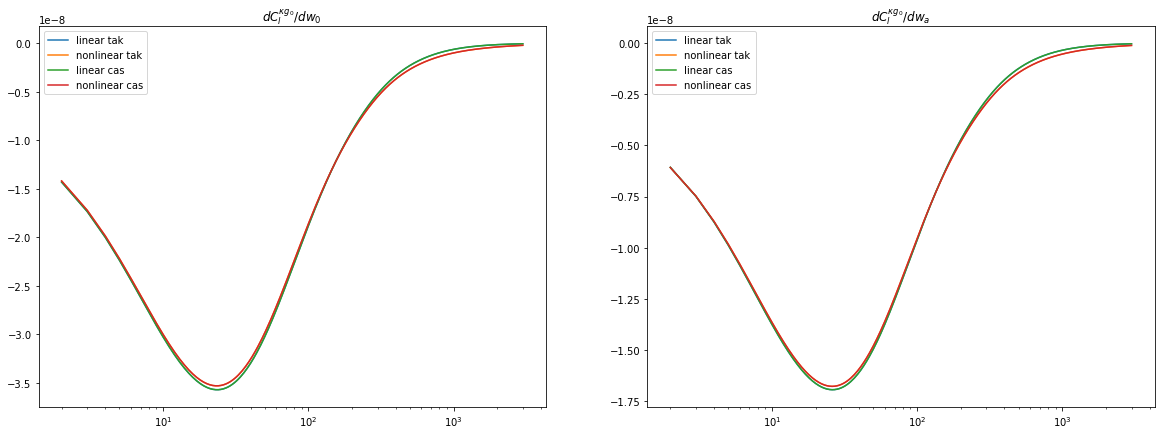

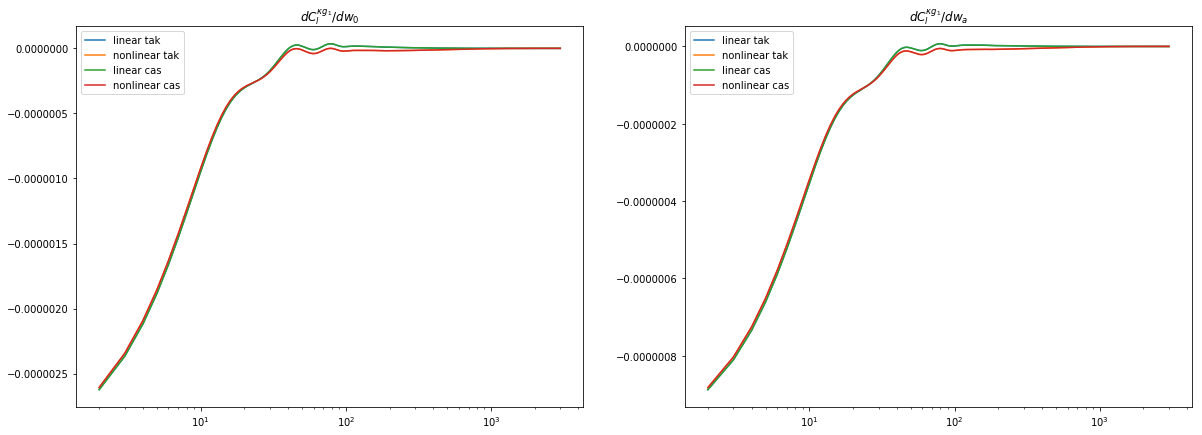

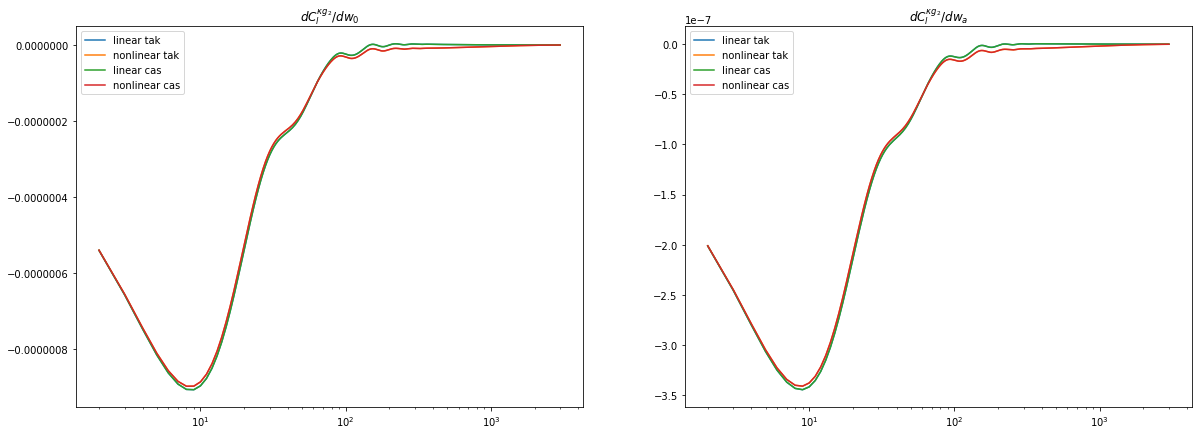

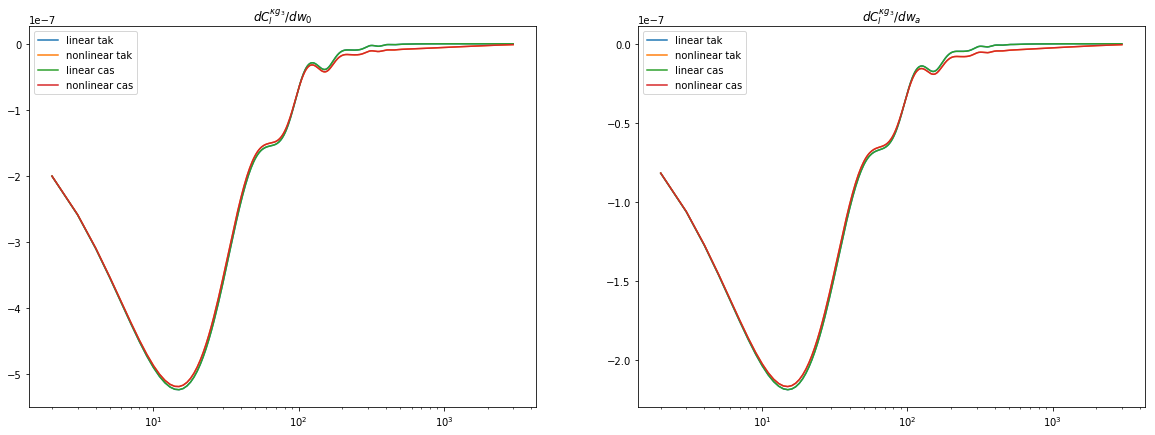

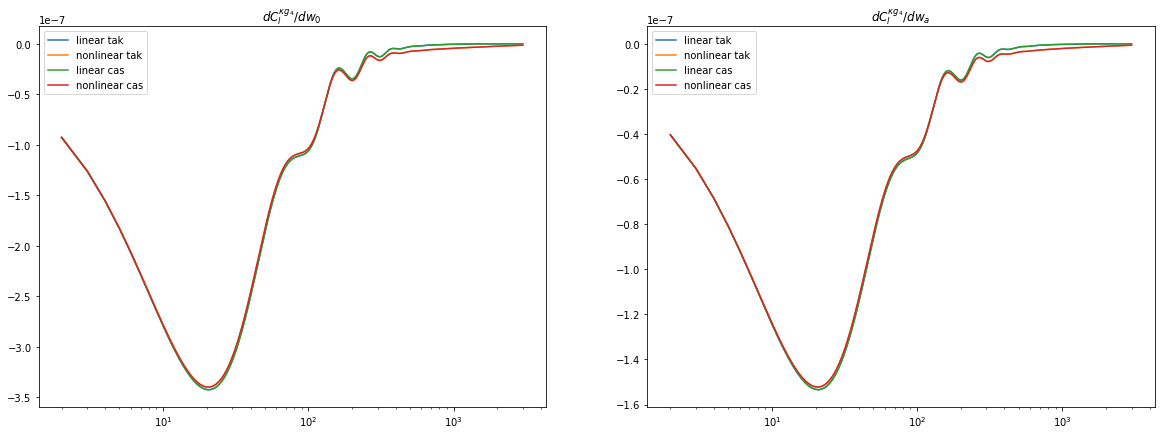

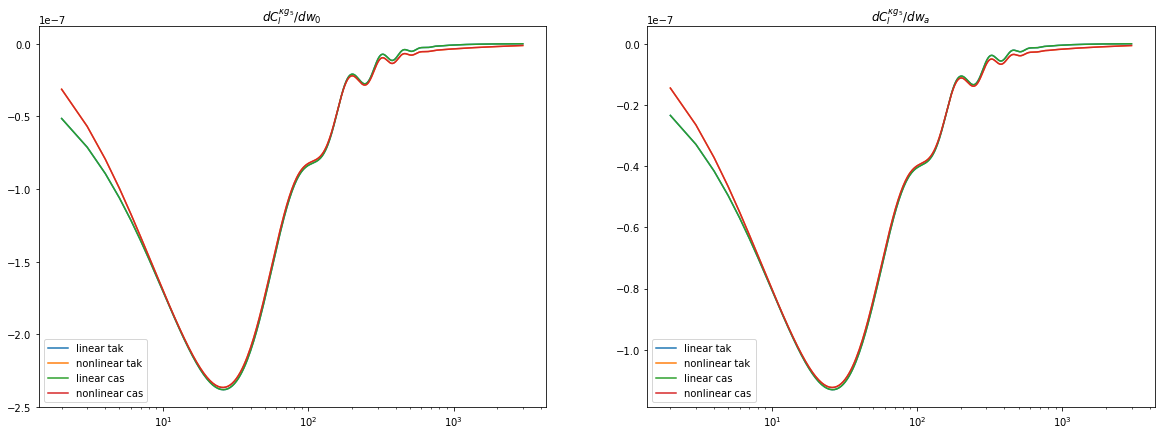

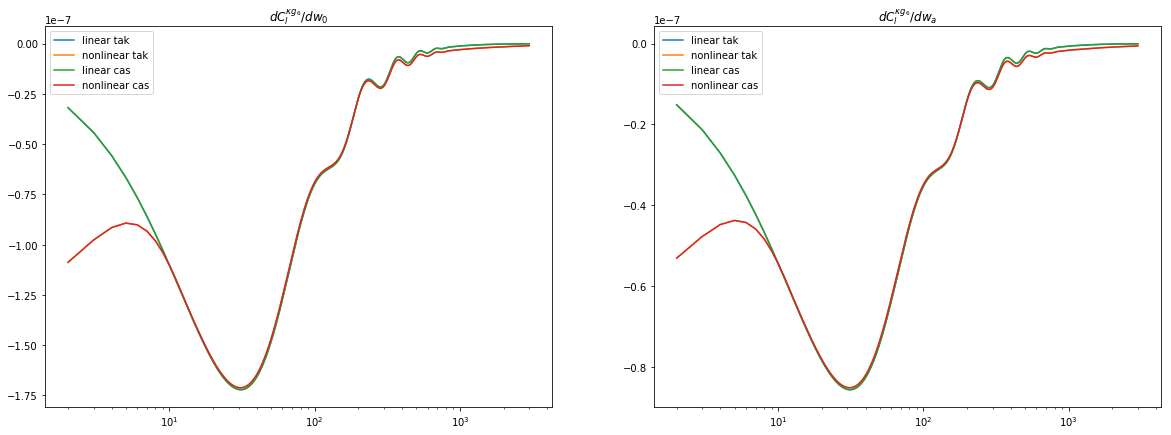

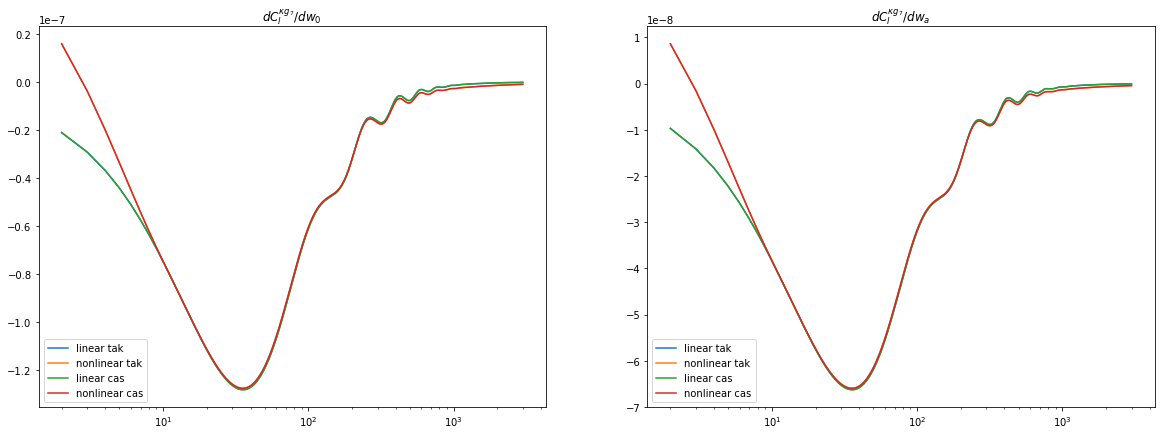

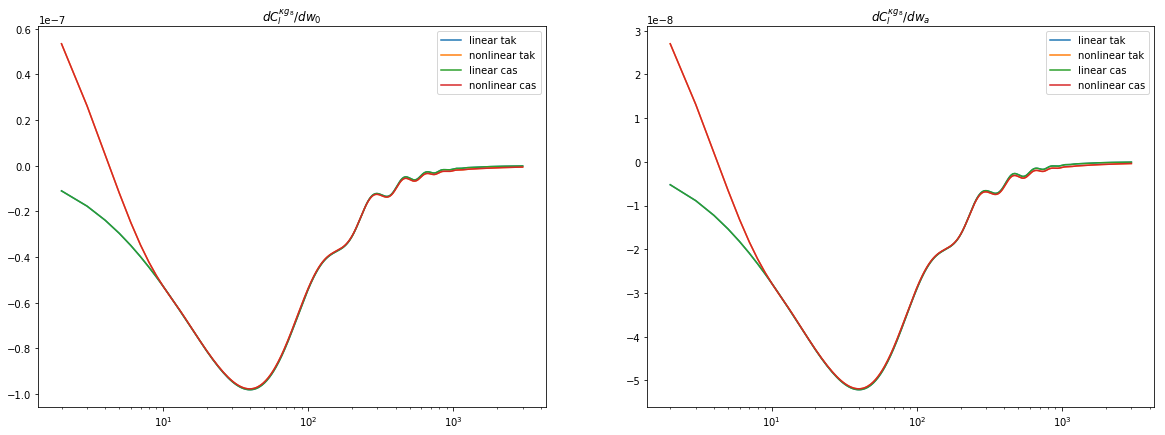

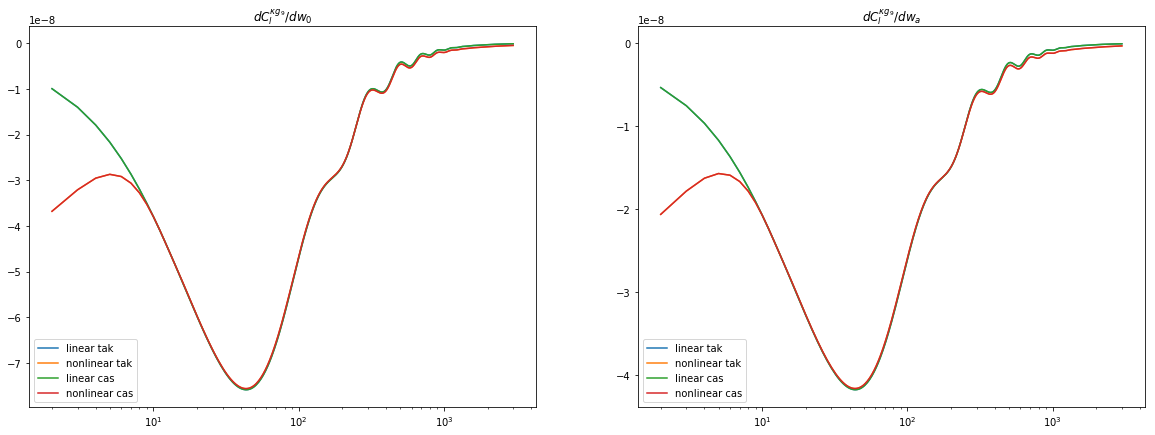

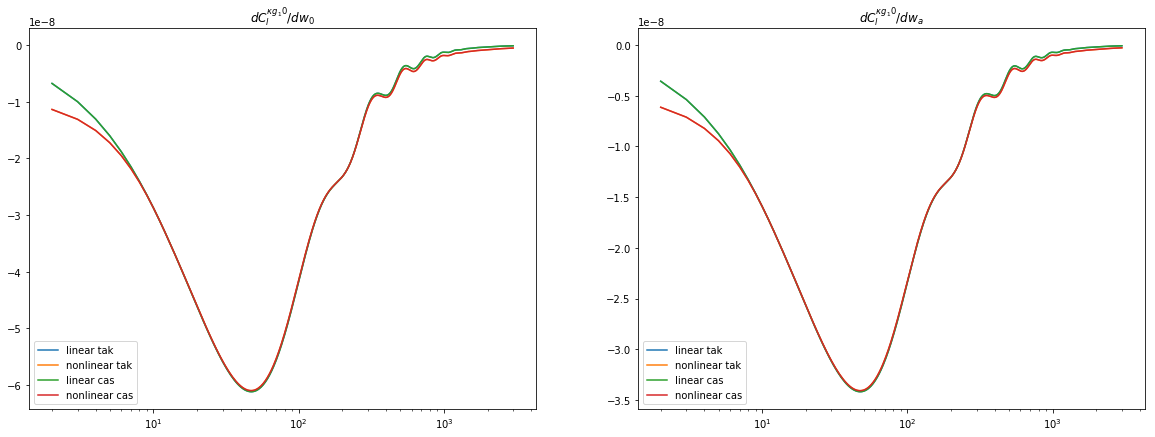

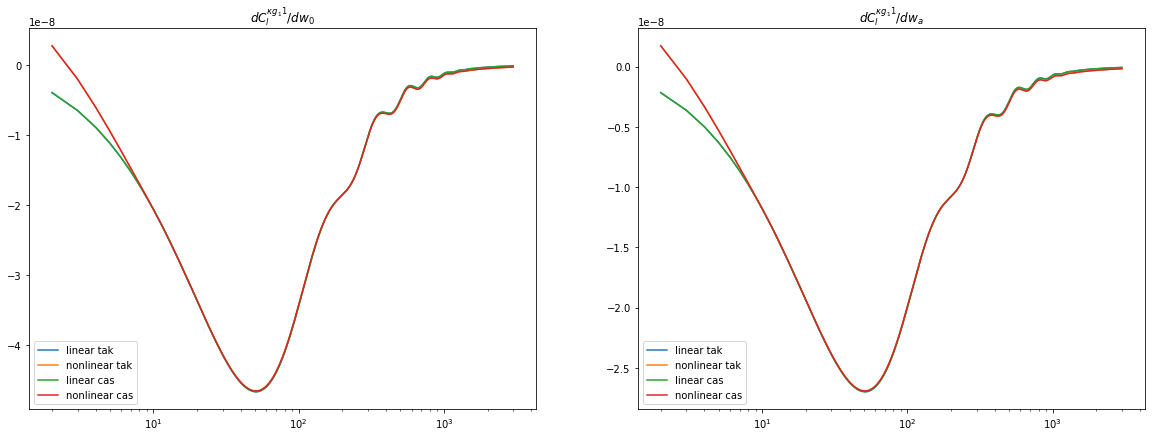

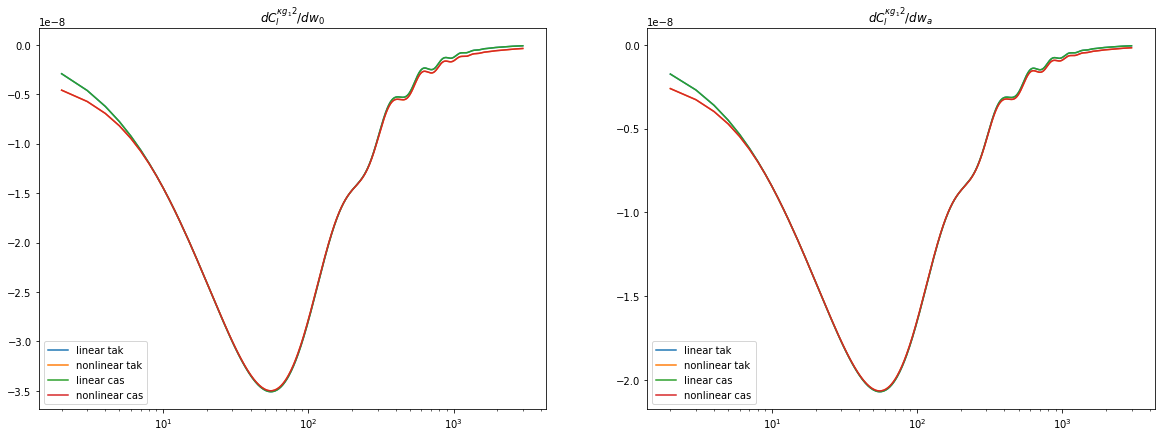

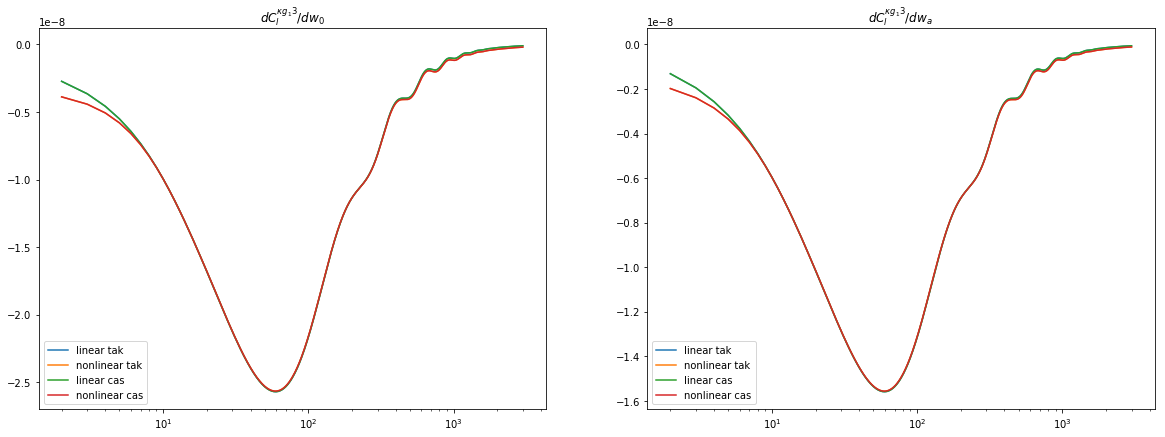

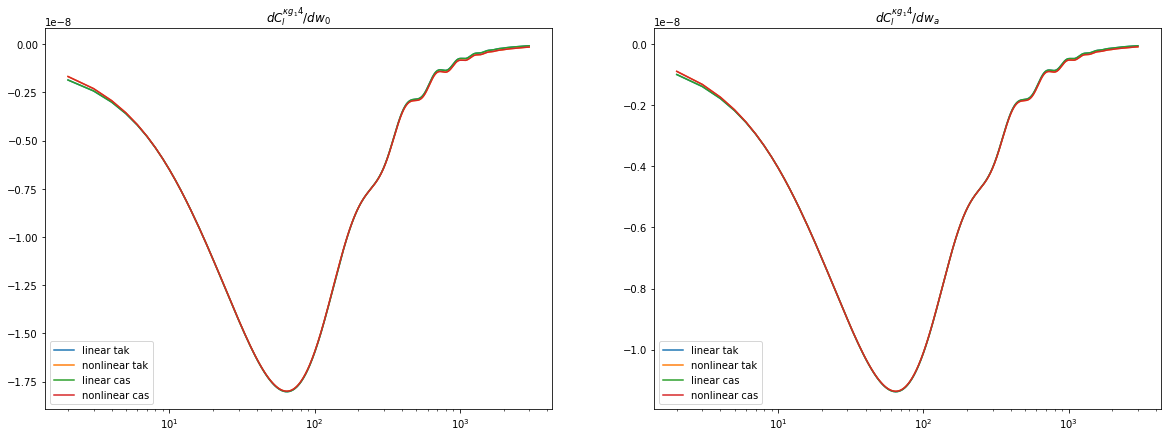

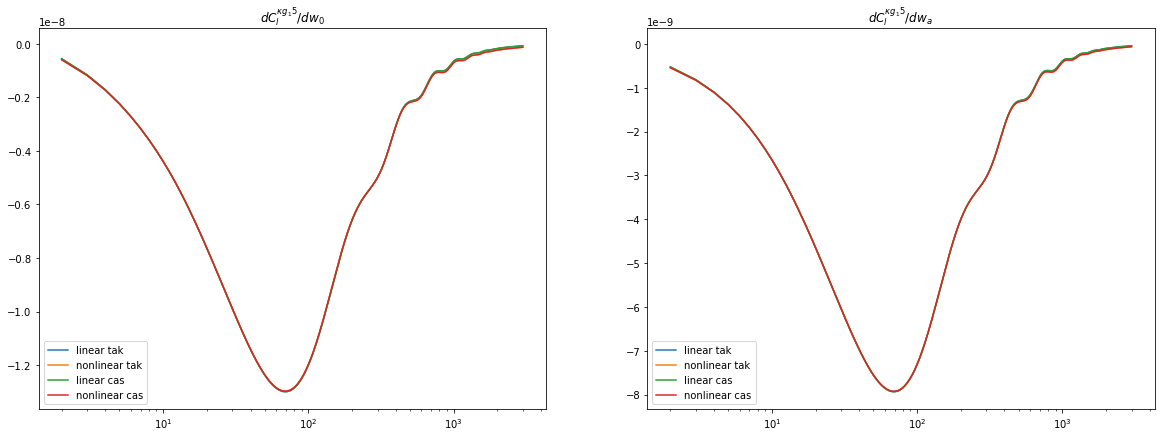

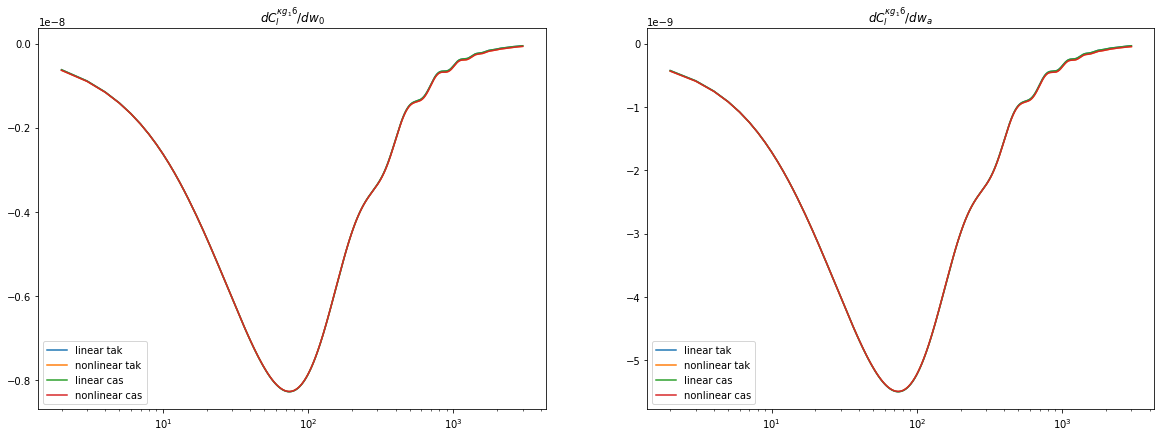

In [90]:
# look at some dCl/dw, dCl/dwa curves
w0Num = 7; waNum = 8
for specNum in range(nToPlot):
    fig = plt.figure(figsize=(20, 7))
    
    plt.subplot(1, 2, 1)
    plt.semilogx(ells,Fobj2.dClVecs[specNum,w0Num],label='linear tak')
    plt.semilogx(ells,Fobj4.dClVecs[specNum,w0Num],label='nonlinear tak')
    plt.semilogx(ells,dClVecs2[specNum,w0Num],label='linear cas')
    plt.semilogx(ells,dClVecs4[specNum,w0Num],label='nonlinear cas')
    plt.legend()
    plt.title(r'$dC_l^{{\kappa g_{0} }}/dw_0$'.format(specNum))
    #plt.show()
    
    plt.subplot(1, 2, 2)
    plt.semilogx(ells,Fobj2.dClVecs[specNum,waNum],label='linear tak')
    plt.semilogx(ells,Fobj4.dClVecs[specNum,waNum],label='nonlinear tak')
    plt.semilogx(ells,dClVecs2[specNum,waNum],label='linear cas')
    plt.semilogx(ells,dClVecs4[specNum,waNum],label='nonlinear cas')
    plt.legend()
    plt.title(r'$dC_l^{{\kappa g_{0} }}/dw_a$'.format(specNum))
    plt.show()
    

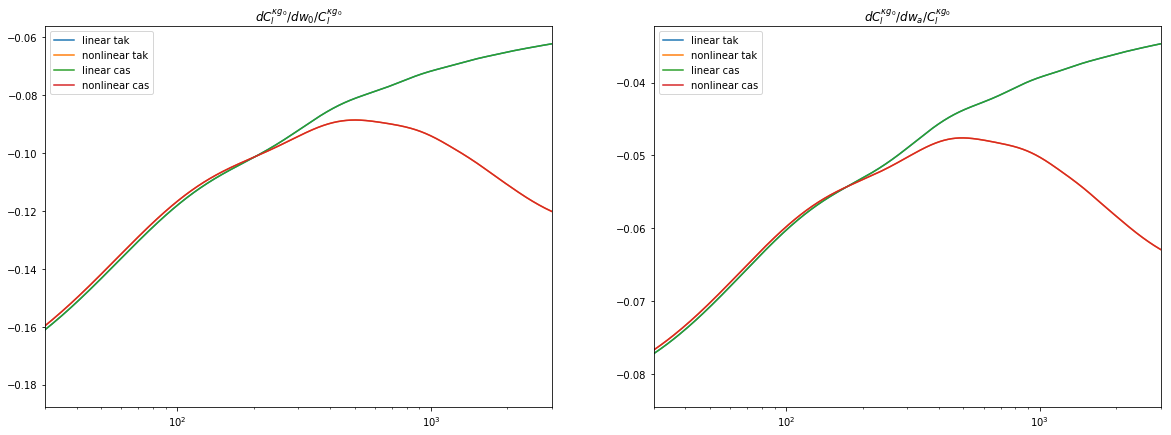

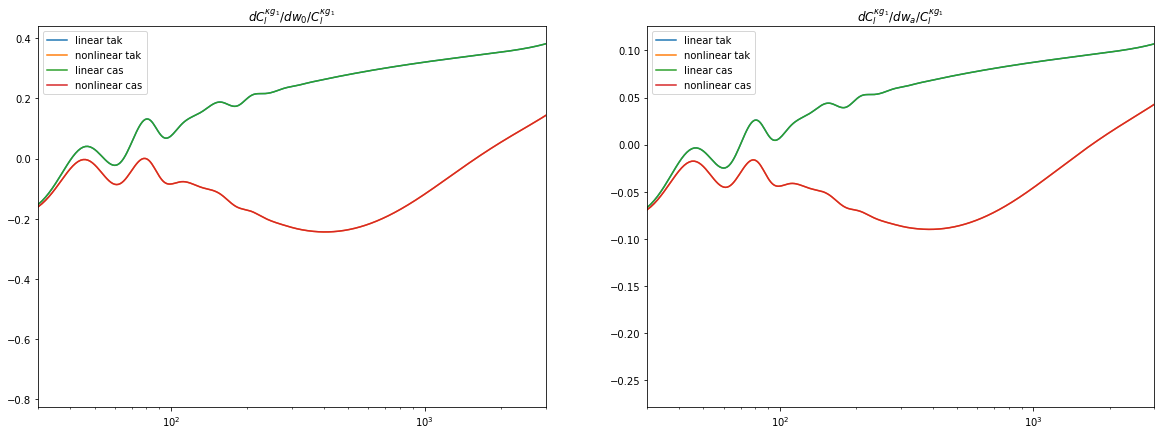

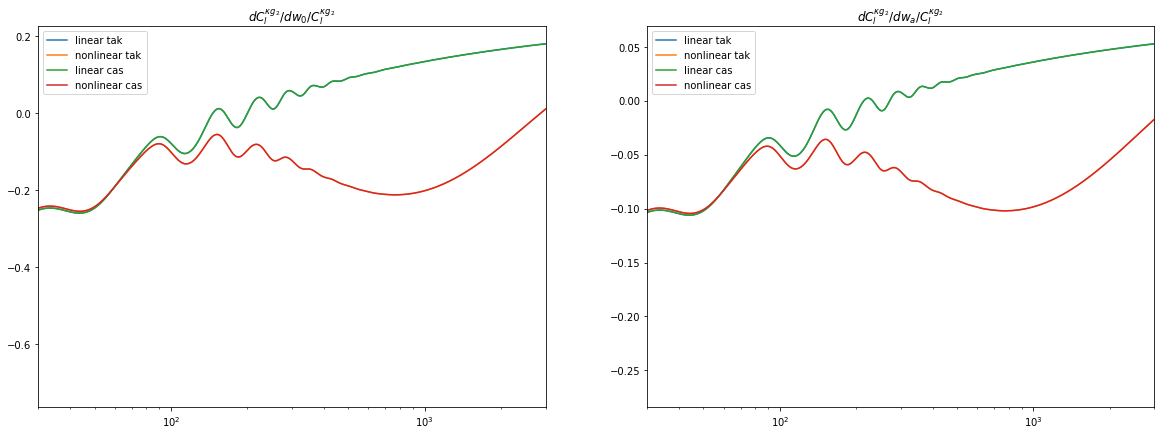

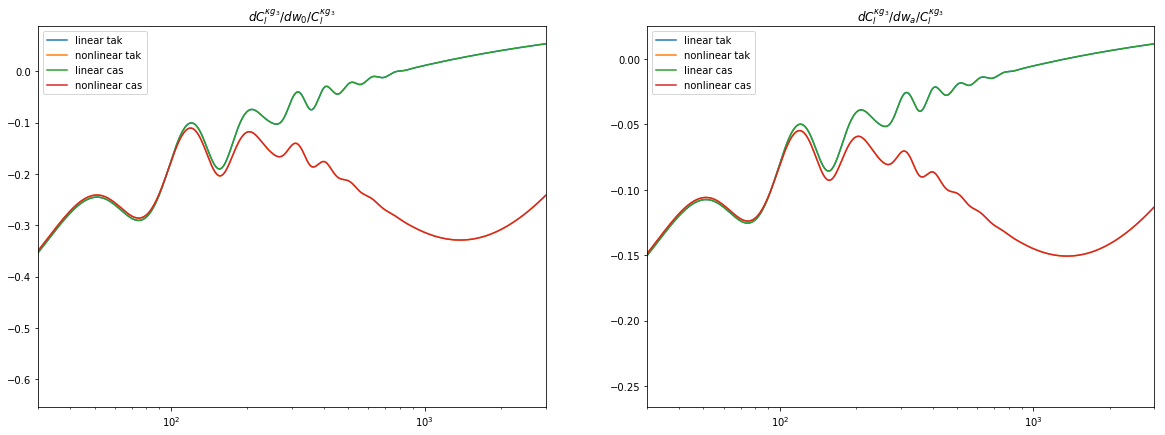

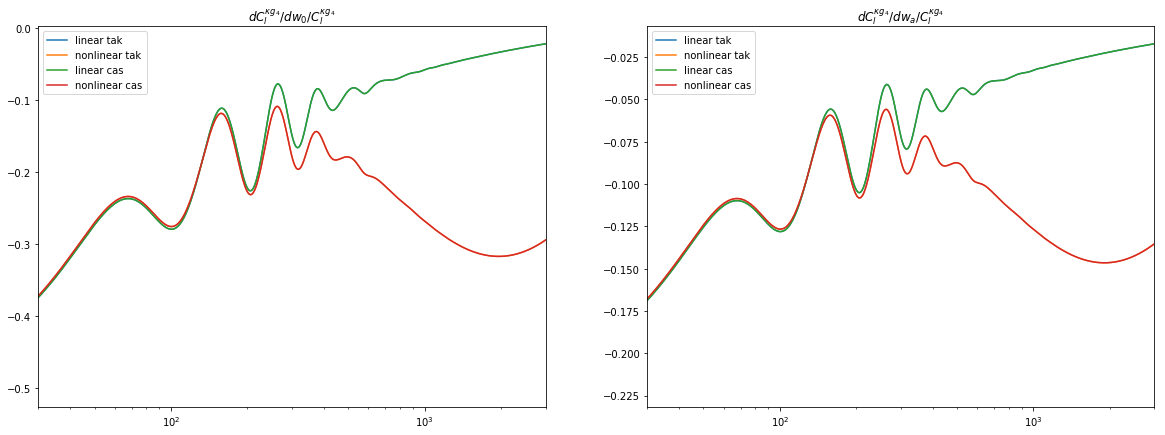

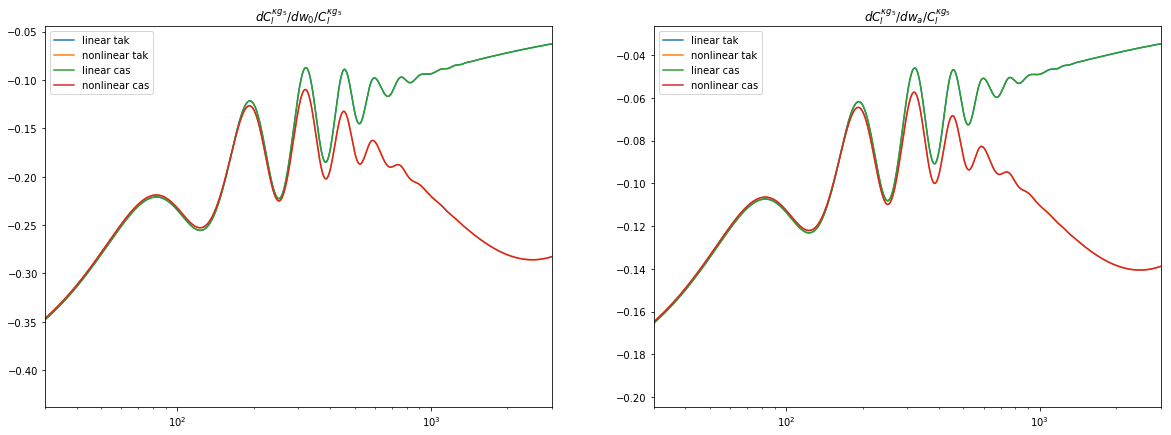

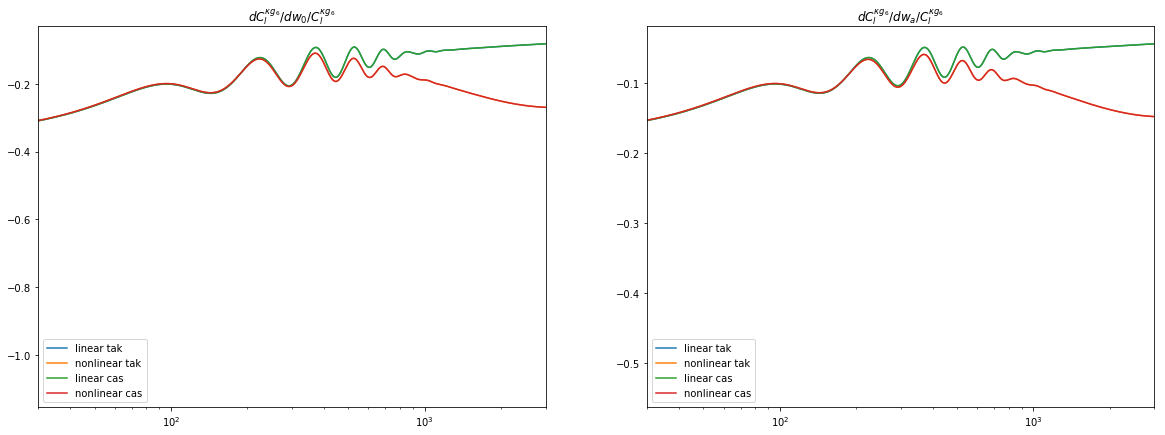

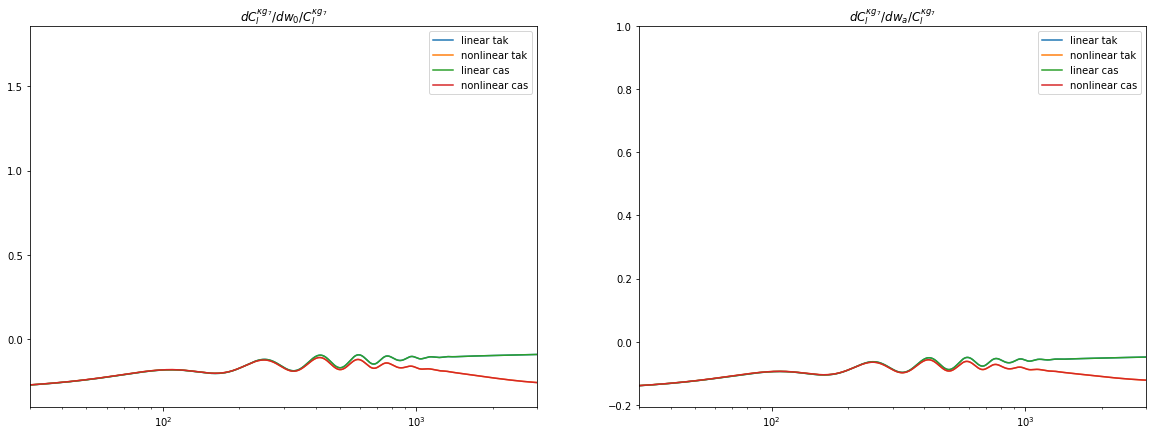

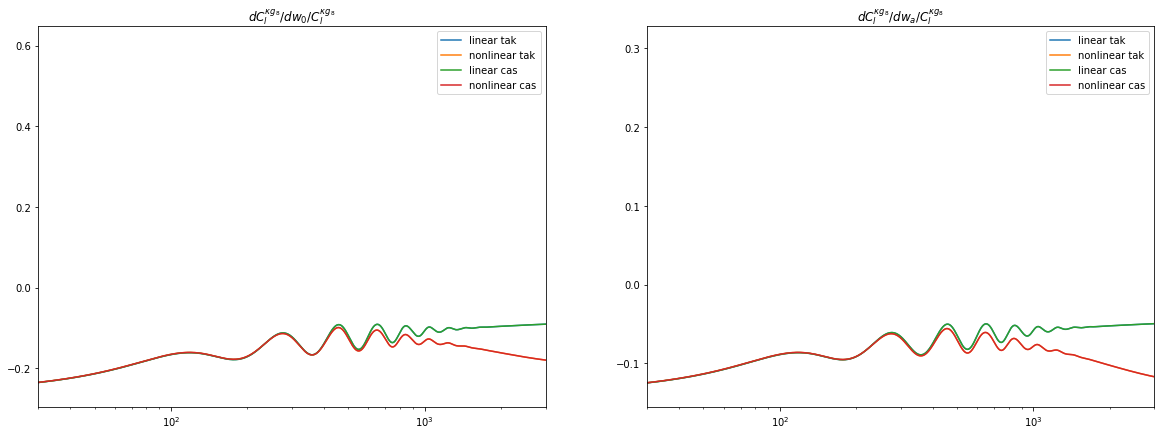

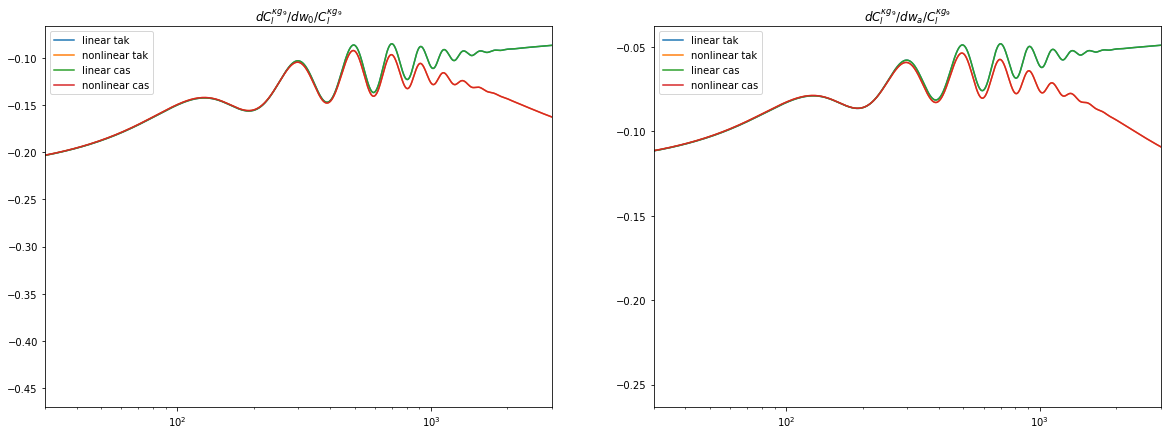

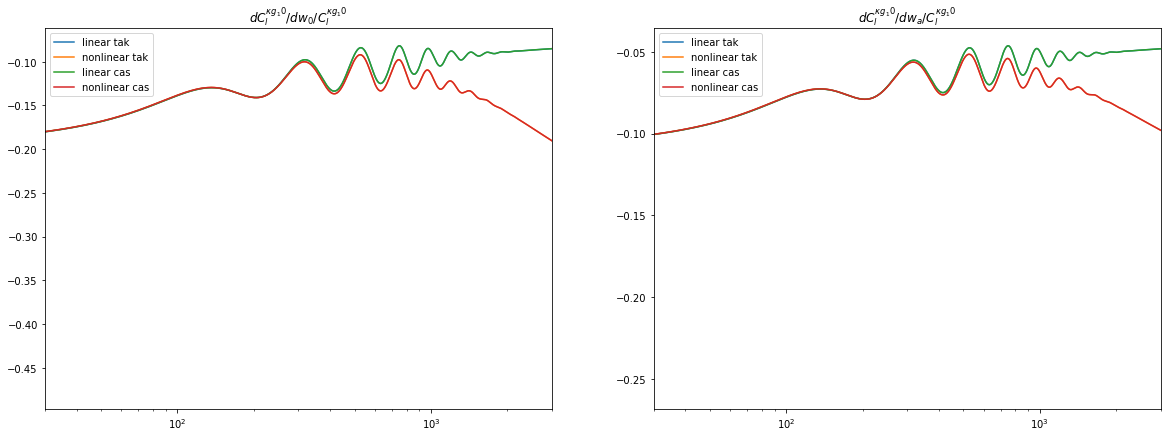

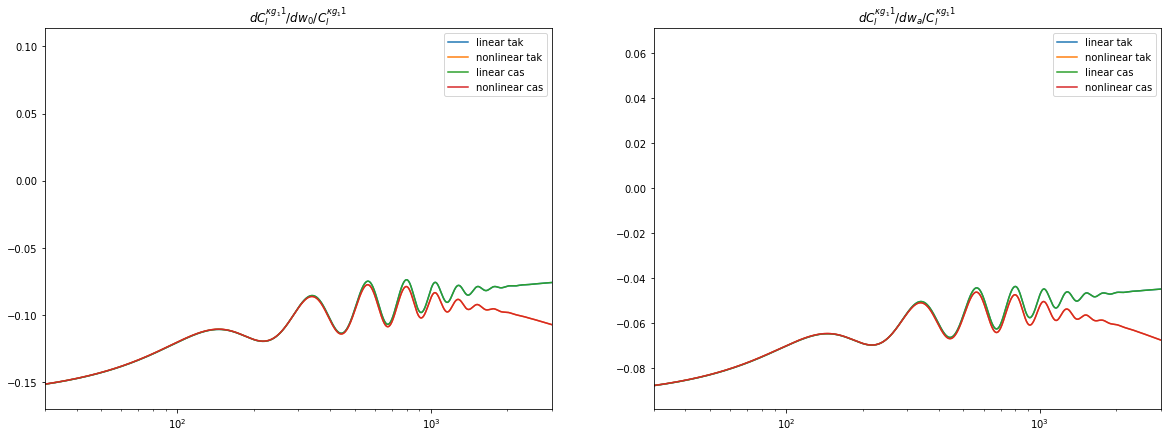

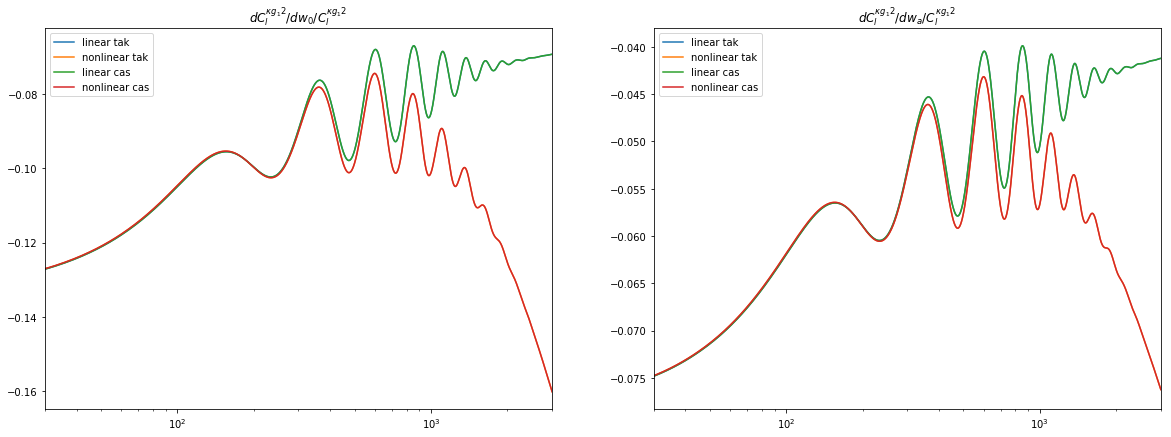

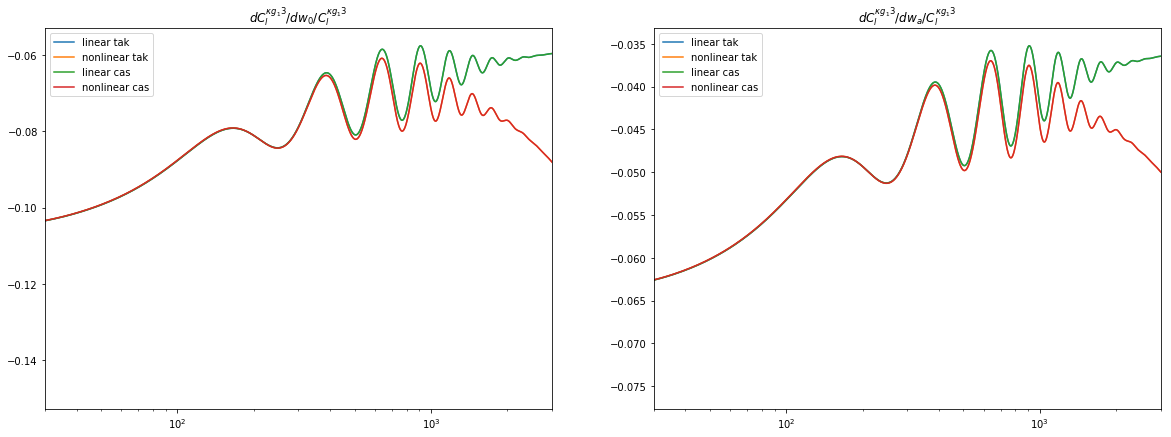

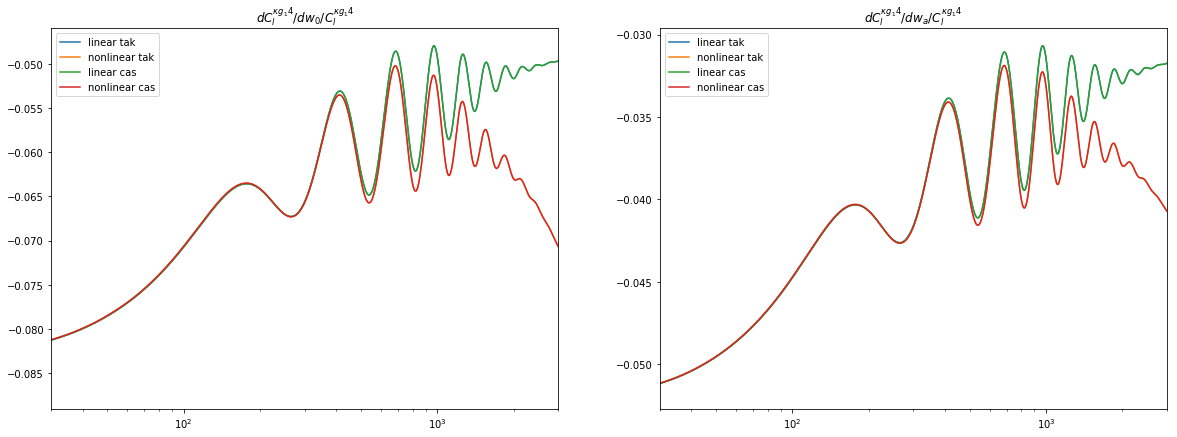

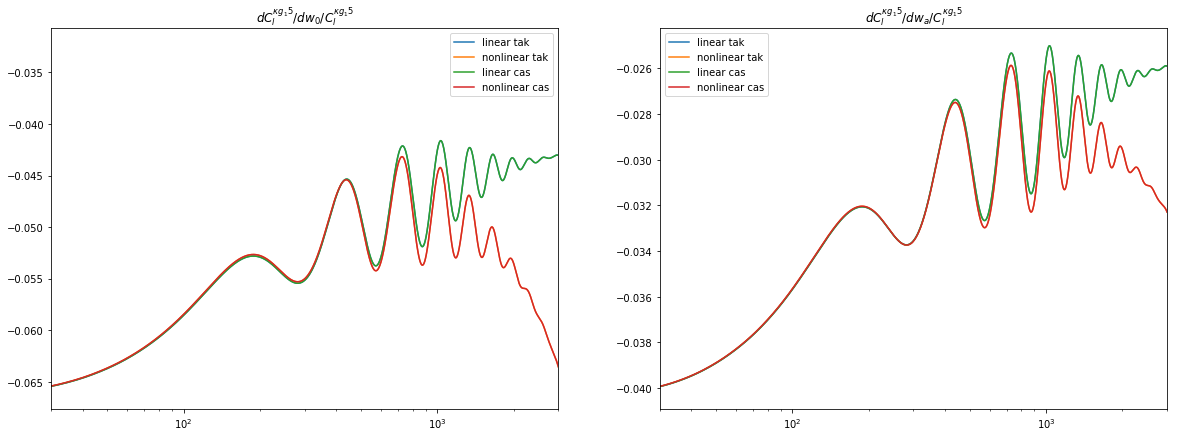

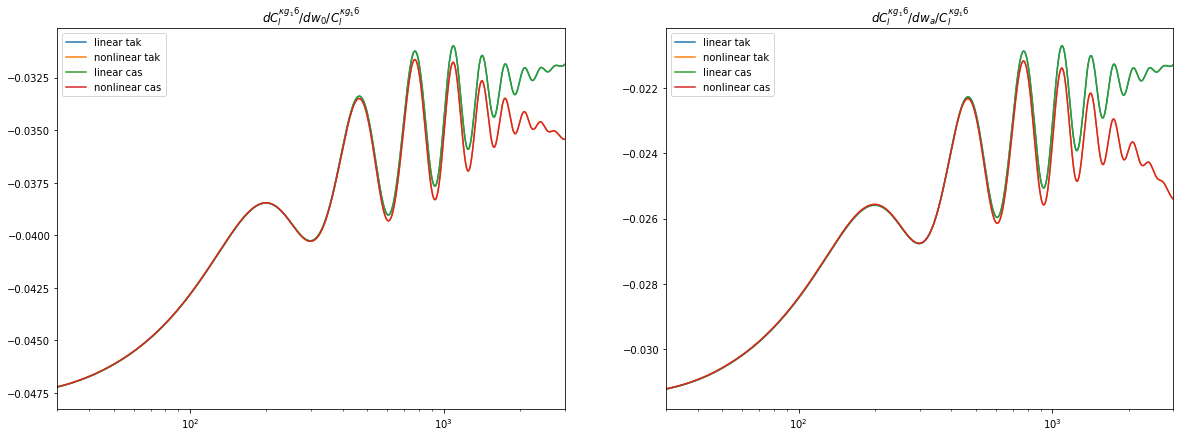

In [91]:
# same but dCl/dw /Cl
# look at some dCl/dw, dCl/dwa curves
w0Num = 7; waNum = 8
for specNum in range(nToPlot):
    fig = plt.figure(figsize=(20, 7))
    
    plt.subplot(1, 2, 1)
    plt.semilogx(ells,Fobj2.dClVecs[specNum,w0Num]/Fobj2.crossCls[0,specNum],label='linear tak')
    plt.semilogx(ells,Fobj4.dClVecs[specNum,w0Num]/Fobj4.crossCls[0,specNum],label='nonlinear tak')
    plt.semilogx(ells,dClVecs2[specNum,w0Num]/Fobj2.crossCls[0,specNum],label='linear cas')
    plt.semilogx(ells,dClVecs4[specNum,w0Num]/Fobj4.crossCls[0,specNum],label='nonlinear cas')
    plt.legend()
    plt.title(r'$dC_l^{{\kappa g_{0} }}/dw_0 / C_l^{{\kappa g_{0} }}$'.format(specNum))
    plt.xlim([30,3000])
    #plt.show()
    
    plt.subplot(1, 2, 2)
    plt.semilogx(ells,Fobj2.dClVecs[specNum,waNum]/Fobj2.crossCls[0,specNum],label='linear tak')
    plt.semilogx(ells,Fobj4.dClVecs[specNum,waNum]/Fobj4.crossCls[0,specNum],label='nonlinear tak')
    plt.semilogx(ells,dClVecs2[specNum,waNum]/Fobj2.crossCls[0,specNum],label='linear cas')
    plt.semilogx(ells,dClVecs4[specNum,waNum]/Fobj4.crossCls[0,specNum],label='nonlinear cas')
    plt.legend()
    plt.title(r'$dC_l^{{\kappa g_{0} }}/dw_a / C_l^{{\kappa g_{0} }}$'.format(specNum))
    plt.xlim([30,3000])
    plt.show()
    

In [92]:
# print comparisons
from prettytable import PrettyTable
paramList = Fobj2.paramList

print 'kg linear'
t = PrettyTable(['Parameter','sigmas_before','sigmas_new','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmas_kg2[i]
    Bi = sigmas_kg2_new[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kg nonlinear'
t = PrettyTable(['Parameter','sigmas_before','sigmas_new','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmas_kg4[i]
    Bi = sigmas_kg4_new[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'TE linear'
t = PrettyTable(['Parameter','sigmas_before','sigmas_new','percent diff.'])
for i,p in enumerate(paramList[:nCosParams]):
    Zi = sigmas_TE2[i]
    Bi = sigmas_TE2_new[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'TE nonlinear'
t = PrettyTable(['Parameter','sigmas_before','sigmas_new','percent diff.'])
for i,p in enumerate(paramList[:nCosParams]):
    Zi = sigmas_TE4[i]
    Bi = sigmas_TE4_new[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

kg linear
+---------------+---------------+------------+---------------+
|   Parameter   | sigmas_before | sigmas_new | percent diff. |
+---------------+---------------+------------+---------------+
|     ombh2     |    0.000741   |  0.000741  |    -0.0299    |
|     omch2     |    0.00205    |  0.00205   |    -0.00366   |
| cosmomc_theta |    2.91e-05   |  2.91e-05  |     0.0278    |
|       As      |    2.78e-11   |  2.79e-11  |     0.532     |
|       ns      |    0.00261    |  0.00261   |     0.133     |
|      tau      |      6.75     |    6.99    |      3.42     |
|      mnu      |     0.0391    |   0.0395   |      1.08     |
|       w       |     0.0784    |   0.0807   |      2.89     |
|       wa      |     0.226     |   0.233    |      3.32     |
|      bin1     |    0.00525    |  0.00532   |       1.4     |
|      bin2     |    0.00497    |  0.00503   |      1.11     |
|      bin3     |    0.00552    |  0.00558   |      1.17     |
|      bin4     |    0.00637    |  0.00645   

In [93]:
# check combined kgTE
def getFijSum(Fijkg,FijTE,nCosParams):
    FijSum = np.copy(Fijkg)
    FijSum[:nCosParams,:nCosParams] += np.copy(FijTE)
    return FijSum

FijSum2 = getFijSum(Fijkg2,FijTE2,nCosParams)
FijSum2_new = getFijSum(Fobj2.Fij,Fobj2.FijTE,nCosParams)
FijSum4 = getFijSum(Fijkg4,FijTE4,nCosParams)
FijSum4_new = getFijSum(Fobj4.Fij,Fobj4.FijTE,nCosParams)

sigmas_sum2 = getSigmas(FijSum2)
sigmas_sum2_new = getSigmas(FijSum2_new)
sigmas_sum4 = getSigmas(FijSum4)
sigmas_sum4_new = getSigmas(FijSum4_new)
print 'done.'

done.


In [94]:
print 'kgTE linear'
t = PrettyTable(['Parameter','sigmas_before','sigmas_new','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmas_sum2[i]
    Bi = sigmas_sum2_new[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kgTE nonlinear'
t = PrettyTable(['Parameter','sigmas_before','sigmas_new','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmas_sum4[i]
    Bi = sigmas_sum4_new[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t


kgTE linear
+---------------+---------------+------------+---------------+
|   Parameter   | sigmas_before | sigmas_new | percent diff. |
+---------------+---------------+------------+---------------+
|     ombh2     |    7.17e-06   |  7.17e-06  |    0.00127    |
|     omch2     |    0.000199   |  0.000199  |    -0.0236    |
| cosmomc_theta |    2.78e-07   |  2.78e-07  |     0.0502    |
|       As      |    1.42e-11   |  1.42e-11  |    -0.00773   |
|       ns      |    0.000787   |  0.000787  |     0.0174    |
|      tau      |    0.00359    |   0.0036   |     0.172     |
|      mnu      |     0.0194    |   0.0194   |      0.12     |
|       w       |     0.055     |   0.0549   |    -0.0934    |
|       wa      |     0.141     |    0.14    |     -0.166    |
|      bin1     |    0.00244    |  0.00243   |     -0.342    |
|      bin2     |    0.00264    |  0.00264   |    -0.0292    |
|      bin3     |    0.00321    |  0.00319   |     -0.484    |
|      bin4     |    0.00365    |  0.00365 

In [95]:
# check affect of fixing wa
# define row,col deleting function
def fixParam(Fij,pNum):
    return np.delete(np.delete(Fij,pNum,0),pNum,1)
waIndex = 8

FijSum2_nowa = fixParam(FijSum2,waIndex)
FijSum2_new_nowa = fixParam(FijSum2_new,waIndex)
FijSum4_nowa = fixParam(FijSum4,waIndex)
FijSum4_new_nowa = fixParam(FijSum4_new,waIndex)

sigmas_sum2_nowa = getSigmas(FijSum2_nowa)
sigmas_sum2_new_nowa = getSigmas(FijSum2_new_nowa)
sigmas_sum4_nowa = getSigmas(FijSum4_nowa)
sigmas_sum4_new_nowa = getSigmas(FijSum4_new_nowa)
print 'done.'

done.


In [96]:
paramList = np.delete(paramList,waIndex)
print paramList

['ombh2' 'omch2' 'cosmomc_theta' 'As' 'ns' 'tau' 'mnu' 'w' 'bin1' 'bin2'
 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11' 'bin12'
 'bin13' 'bin14' 'bin15' 'bin16']


In [97]:
print 'kgTE linear, wa fixed'
t = PrettyTable(['Parameter','sigmas_before','sigmas_new','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmas_sum2_nowa[i]
    Bi = sigmas_sum2_new_nowa[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kgTE nonlinear, wa fixed'
t = PrettyTable(['Parameter','sigmas_before','sigmas_new','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmas_sum4_nowa[i]
    Bi = sigmas_sum4_new_nowa[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t


kgTE linear, wa fixed
+---------------+---------------+------------+---------------+
|   Parameter   | sigmas_before | sigmas_new | percent diff. |
+---------------+---------------+------------+---------------+
|     ombh2     |    7.17e-06   |  7.17e-06  |         0     |
|     omch2     |    0.000177   |  0.000177  |         0     |
| cosmomc_theta |    2.58e-07   |  2.58e-07  |         0     |
|       As      |    1.39e-11   |  1.39e-11  |         0     |
|       ns      |    0.000768   |  0.000768  |         0     |
|      tau      |    0.00351    |  0.00351   |         0     |
|      mnu      |     0.0185    |   0.0185   |         0     |
|       w       |     0.0123    |   0.0123   |         0     |
|      bin1     |    0.00235    |  0.00235   |         0     |
|      bin2     |     0.0026    |   0.0026   |         0     |
|      bin3     |    0.00301    |  0.00301   |         0     |
|      bin4     |    0.00345    |  0.00345   |         0     |
|      bin5     |    0.00392    |

In [98]:
# Fixing wa has caused the "before" and "new" cases to converge, as expected.
# However, there is still discrepancy between the linear and nonlinear cases.
# However again, there has been no k-limit imposed on these and therefore ell goes well into the nonlinear regime.